# 02 Computational Representations of (Biomedical) Shapes

## B) Shapes of Curves

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/02_cells.png" width=800px alt="default"/></center>
<center>Cell images obtained by fluorescence microscopy. </center>


# Outline: Geometric Learning for BioShape Analysis

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
- **Unit 3 (Machine Learning)**: Geometric Machine Learning for Shape Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

<center><img src="figs/00_bioshape.jpg" width=500px alt="default"/></center>

Examples and applications will be taken from cutting-edge research in the **biomedical field**.

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - **B) Shapes of curves**
    - Motivation: Shape of Cancer Treatments
    - Practice: Analysis with SRV
    - Theory: Geometry of SRV manifolds
    - Application: Osteoscarcoma cells
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations

## Motivation: Shape of Cancer Treatments

### Cell Shapes and Cell Functions

Each cell type has evolved in a **shape** that is best related to its function.

$\color{#047C91}{\text{Examples}}$:
- Neurons: axons and dendrites to _reach out_ to other nerve cells and help pass messages quickly. 
- Red blood cells: round shape to _move quickly_ through capillaries. 

<center><img src="figs/02_from_stem.png" width=600px alt="default"/></center>

### Cell Shapes and Cell Health: Shape of Cancer?

Within a given cell type, cell **shape** is related to "cell health".

$\color{#047C91}{\text{Example}}$: Irregular shapes of cancer cells.

<center><img src="figs/02_cancer_cells22.jpg" width=1000px alt="default"/></center>

### An Insider Look

$\color{#EF5645}{\text{Definition}}$: Actin is a family of globular multi-functional proteins that:
- form microfilaments in the cytoskeleton,
- play a significant role in determining a cell shape.


<center><img src="figs/02_actin.jpeg" width=600px alt="default"/></center>
<center>Human Lung Carcinoma Cells (A-549) - https://tinyurl.com/2p8axfxe</center>
<center> Cells nuclei (blue), actin cytoskeleton (green) and lipid membrane (red). </center>

### An Insider Look

$\color{#EF5645}{\text{Definition}}$: Actin is a family of globular multi-functional proteins that:
- also participate in important cellular processes, including muscle contraction, cell division, cell signaling, etc.
- $\rightarrow$ cell shapes gives us insights on actin's behavior in the cell.

<center><img src="figs/02_actin.jpeg" width=600px alt="default"/></center>
<center>Human Lung Carcinoma Cells (A-549) - https://tinyurl.com/2p8axfxe</center>
<center> Cells nuclei (blue), actin cytoskeleton (green) and lipid membrane (red). </center>

### Shape of Cancer Treatments

The emergence of large-scale cell live imaging raises interest for morphological studies!

$\color{#EF5645}{\text{Question for today}}$: Which cancer treatments have a stronger effect on the actin and cytoskeleton?

<center><img src="figs/02_cells.png" width=1300px alt="default"/></center>

<center> Cells nuclei (blue), actin cytoskeleton (green) and lipid membrane (red). </center>

### Data


- **Raw:** Images of mouse osteosarcoma (bone cancer) cells from fluorescence microscopy
- **Preprocessing:** Segmentation and contour extraction (ECE278a)
- 2 cell lines (i.e. cultures of cells): DUNN and DLM8 (more aggressive cancer)
- 3 states: 1 control group, 2 cancer treatments: Jasplakinolide (jasp) and cytochalasin D (cytd).

$\rightarrow$ $\color{#EF5645}{\text{Question for today}}$: Which cancer treatments lead to more irregular cell shapes (curve shapes)?

<center><img src="figs/02_curves_blueorange.png" width=1100px alt="default"/></center>

 Load the Dataset.

In [1]:
import geomstats.datasets.utils as data_utils

cells, lines, treatments = data_utils.load_cells()
print(f"Total number of cells : {len(cells)}")
print(f"The array contained the 0th cell has shape {cells[0].shape}.")

INFO: Using numpy backend


Total number of cells : 650
The array contained the 0th cell has shape (210, 2).


In [2]:
import numpy as np
import pandas as pd

TREATMENTS = np.unique(treatments); print(TREATMENTS)
LINES = np.unique(lines); print(LINES)

['control' 'cytd' 'jasp']
['dlm8' 'dunn']


Count how many cells are available in each cell line and each treatment group.

In [4]:
ds = {}; n_cells_arr = np.zeros((3, 2))
for i, treatment in enumerate(TREATMENTS):
    ds[treatment] = {}
    for j, line in enumerate(LINES):
        to_keep = np.array(
            [
                one_treatment == treatment and one_line == line
                for one_treatment, one_line in zip(treatments, lines)
            ]
        )
        ds[treatment][line] = [
            cell_i for cell_i, to_keep_i in zip(cells, to_keep) if to_keep_i
        ]
        nb = len(ds[treatment][line])
        n_cells_arr[i, j] = nb

n_cells_df = pd.DataFrame({"dlm8": n_cells_arr[:, 0], "dunn": n_cells_arr[:, 1]}); n_cells_df = n_cells_df.set_index(TREATMENTS)
display(n_cells_df)

,dlm8,dunn
control,114.0,204.0
cytd,82.0,93.0
jasp,62.0,95.0


Plot one cell.

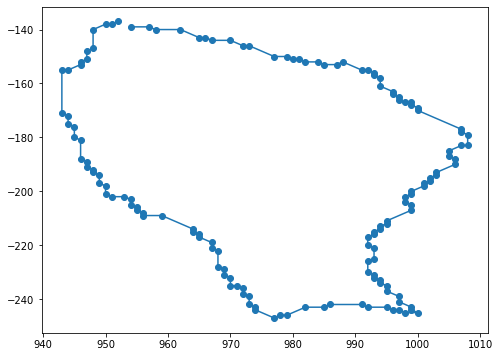

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(cells[1][:, 0], cells[1][:, 1], "C0", marker="o");

### From Shapes of Landmarks to Shapes of Curves

$\color{#EF5645}{\text{Question for today}}$: Which cancer treatments lead to more irregular cell shapes (_curve shapes_)?

$\rightarrow$ Difference between shapes of landmarks and shapes of curves?

- Landmarks are "biologically meaningful" points: 
  - Their index is biologically relevant.

- Curves are made of sampling points that are discretizing a continuous curve: 
  - Their position along the curve is not biologically relevant.

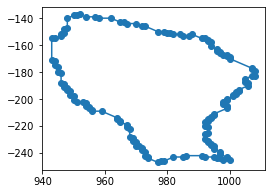

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3)); plt.plot(cells[1][:, 0], cells[1][:, 1], "C0", marker="o");

### From Curves to Shapes of Curves

$\color{#EF5645}{\text{Definition}}$: Two curves are said to have the same shape if one curve can be obtained by translating, rotating, re-scaling, or _reparameterizing_ the other.

$\rightarrow$ We do not want to do machine learning on the curves directly...

...but rather on the shapes of these curves.

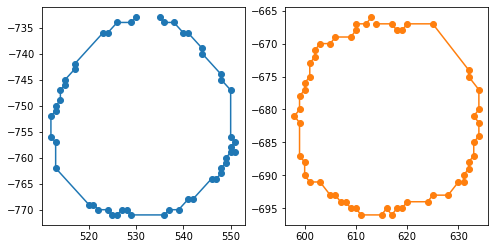

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(cells[2][:, 0], cells[2][:, 1], "C0", marker="o"); axes[1].plot(cells[3][:, 0], cells[3][:, 1], "C1", marker="o");

## Practice: Analysis in Quotient SRV space

1. Perform an equivalent of Procrustes Analysis:

- Remove translation, scaling, and rotation:
  - e.g. as in Procrustes analysis, by optimally superimposing the curves.
- Remove reparameterization:
  - done implicitly in the statistical analysis: by computing in a "Quotient SRV" space.

2. Perform statistical analysis of superimposed objects in Quotient SRV space.

<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>


**1. Perform an equivalent of Procrustes Analysis:**

- Remove translation, scaling, and rotation:
  - e.g. as in Procrustes analysis, by optimally superimposing the curves.
- Remove reparameterization:
  - done implicitly in the statistical analysis: by computing in a "Quotient SRV" space.
  
$\rightarrow$ Show the action of translation, scaling, rotation and reparameterization.

2. Perform statistical analysis of superimposed objects in Quotient SRV space.

<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>

### Make toy dataset of 2 curves.

Create two parameterized curves in the 2D Euclidean plane $\mathbb{R}^2$.

In [8]:
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.discrete_curves import DiscreteCurves

r2 = Euclidean(dim=2)
curves_r2 = DiscreteCurves(ambient_manifold=r2)

parametrized_curve_a = lambda x: np.transpose(
    np.array([1 + 2 * np.sin(np.pi * x), 3 + 2 * np.cos(np.pi * x)]) / (2*np.pi))
parametrized_curve_b = lambda x: np.transpose(
    np.array([5 * np.ones(len(x)), 4 * (1 - x) + 1]) / 4)

Sample points along these curves to turn them into discrete curves.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n_sampling_points = 41
sampling_points = np.linspace(0.0, 1.0, n_sampling_points)
curve_a0 = parametrized_curve_a(sampling_points); curve_a = curve_a0 - np.mean(curve_a0, axis=0)
curve_b0 = parametrized_curve_b(sampling_points); curve_b = curve_b0 - np.mean(curve_b0, axis=0)
print(curve_a.shape, curve_b.shape)

(41, 2) (41, 2)


Visualize the curves.

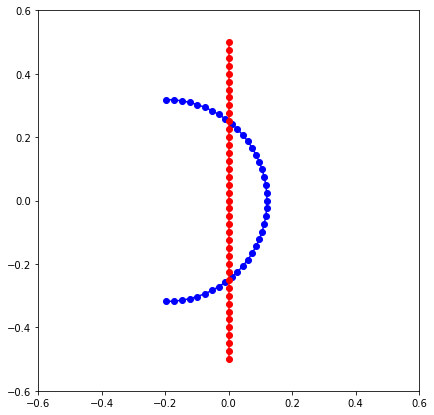

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(curve_a[:, 0], curve_a[:, 1], "o-b")
ax.plot(curve_b[:, 0], curve_b[:, 1], "o-r")
ax.set_aspect('equal'); ax.set_ylim((-0.6, 0.6)); ax.set_xlim((-0.6, 0.6));

Remove translation and scaling.

In [13]:
bar_a = np.mean(curve_a, axis=0); bar_b = np.mean(curve_b, axis=0)
print("Barycenters of the two curves:", bar_a, bar_b)

Barycenters of the two curves: [-1.15084094e-17  8.52976226e-17] [ 0.00000000e+00 -2.70786104e-17]


In [17]:
len_a = sum([np.linalg.norm(curve_a[i] - curve_a[i-1]) for i in range(1, n_sampling_points)])
len_b = sum([np.linalg.norm(curve_b[i] - curve_b[i-1]) for i in range(1, n_sampling_points)])
print(f"Lengths of the two curves: {len_a:.3f} and {len_b:.3f}.")

Lengths of the two curves: 1.000 and 1.000.


$\color{#047C91}{\text{Exercise}}$: The two curves are already centered and of same length. 
- What would you do to remove translation and scaling if this was not the case?

1. Project in Kendall's preshape space.

or 2. Remove barycenter and scale to length 1 manually.

In [19]:
from geomstats.geometry.pre_shape import PreShapeSpace

preshape = PreShapeSpace(k_landmarks=n_sampling_points+1, m_ambient=2)
curve_b_bis = preshape.projection(curve_a); curve_a_bis = preshape.projection(curve_a)

Remove rotation.

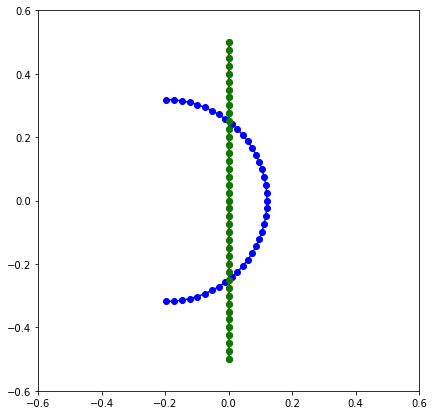

In [21]:
curve_b_bis = preshape.align(curve_b, base_point=curve_a)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(curve_a[:, 0], curve_a[:, 1], "o-b")
ax.plot(curve_b[:, 0], curve_b[:, 1], "o-r")
ax.plot(curve_b_bis[:, 0], curve_b_bis[:, 1], "o-g")
ax.set_aspect('equal'); ax.set_ylim((-0.6, 0.6)); ax.set_xlim((-0.6, 0.6));

The curves were already optimally oriented.

Remove the parameterization. 

- Get main tool: the `metric` of the "Quotient SRV" space.


In [23]:
metric = curves_r2.quotient_square_root_velocity_metric

- Use the `metric` to compute:
  - distance between the two curves,
  - geodesics between the two curves,

$\rightarrow$ Show that the results are not affected by reparameterization.

Compute the distance between the two curves.

In [24]:
dist_ab = metric.dist(curve_a, curve_b)
print(f"The distance between the two curves shapes is: {dist_ab:.3f}")

The distance between the two curves shapes is: 0.738


Compute the geodesic between the two curves, using `horizontal_geodesic`.

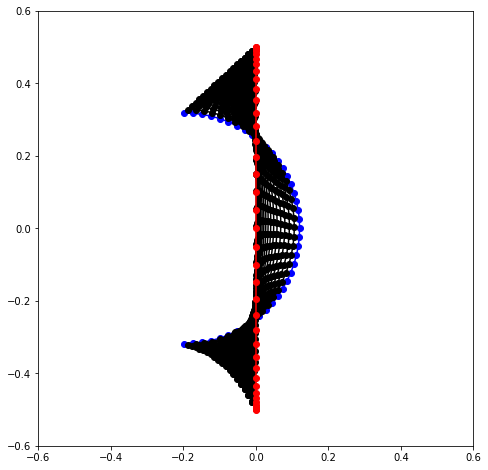

In [25]:
geod_fun = metric.horizontal_geodesic(initial_curve=curve_a, end_curve=curve_b)
n_times = 20; times = np.linspace(0.0, 1.0, n_times); geod = geod_fun(times)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(geod[0, :, 0], geod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    ax.plot(geod[i, :, 0], geod[i, :, 1], "o-k")
ax.plot(geod[-1, :, 0], geod[-1, :, 1], "o-r"); ax.set_aspect('equal'); ax.set_ylim((-0.6, 0.6)); ax.set_xlim((-0.6, 0.6));

Change visualization to better observe the same geodesic.


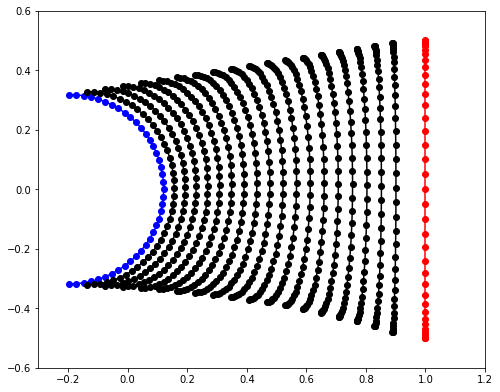

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(geod[0, :, 0], geod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    ax.plot(geod[i, :, 0]+i/n_times, geod[i, :, 1], "o-k")
ax.plot(geod[-1, :, 0]+1, geod[-1, :, 1], "o-r")
ax.set_aspect('equal'); ax.set_ylim((-0.6, 0.6)); ax.set_xlim((-0.3, 1.2));

$\rightarrow$ Show that the result are not affected by reparameterization.

- Reparameterize the curves.

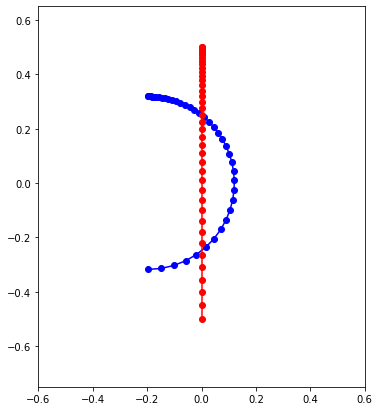

In [27]:
reparam_curve_a = parametrized_curve_a(sampling_points ** 2) - np.mean(curve_a0, axis=0)
reparam_curve_b = parametrized_curve_b(sampling_points ** 2) - np.mean(curve_b0, axis=0)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.plot(reparam_curve_a[:, 0], reparam_curve_a[:, 1], "o-b"); ax.plot(reparam_curve_b[:, 0], reparam_curve_b[:, 1], "o-r")
ax.set_aspect('equal'); ax.set_ylim((-0.75, 0.65)); ax.set_xlim((-0.6, 0.6));

Observe that the distance is independent of reparameterization.

In [28]:
dist_ab = metric.dist(curve_a, curve_b)
print(f"Distance: {dist_ab:.3f}")

dist_ab = metric.dist(reparam_curve_a, curve_b)
print(f"Distance: {dist_ab:.3f}")

dist_ab = metric.dist(curve_a, reparam_curve_b)
print(f"Distance: {dist_ab:.3f}")

dist_ab = metric.dist(reparam_curve_a, reparam_curve_b)
print(f"Distance: {dist_ab:.3f}")

Distance: 0.738
Distance: 0.738
Distance: 0.738
Distance: 0.738


Observe that geodesics are independent of reparameterization.

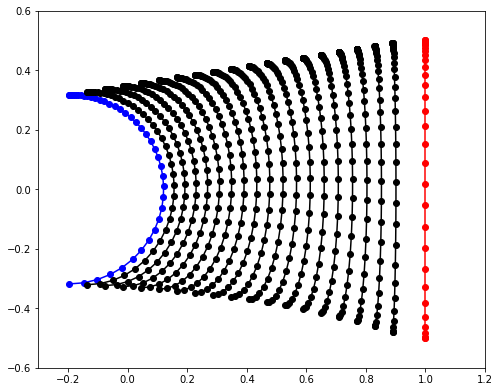

In [30]:
geod_fun = metric.horizontal_geodesic(initial_curve=reparam_curve_a, end_curve=curve_b)

n_times = 20; times = np.linspace(0.0, 1.0, n_times); geod = geod_fun(times)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(geod[0, :, 0], geod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    ax.plot(geod[i, :, 0]+i/n_times, geod[i, :, 1], "o-k")
ax.plot(geod[-1, :, 0]+1, geod[-1, :, 1], "o-r"); ax.set_aspect('equal'); ax.set_ylim((-0.6, 0.6)); ax.set_xlim((-0.3, 1.2));

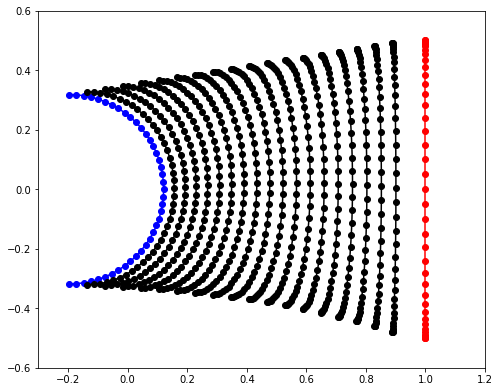

In [31]:
geod_fun = metric.horizontal_geodesic(initial_curve=curve_a, end_curve=reparam_curve_b)

n_times = 20; times = np.linspace(0.0, 1.0, n_times); geod = geod_fun(times)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(geod[0, :, 0], geod[0, :, 1], "o-b")
for i in range(1, n_times - 1):
    ax.plot(geod[i, :, 0]+i/n_times, geod[i, :, 1], "o-k")
ax.plot(geod[-1, :, 0]+1, geod[-1, :, 1], "o-r"); ax.set_aspect('equal'); ax.set_ylim((-0.6, 0.6)); ax.set_xlim((-0.3, 1.2));

1. Perform an equivalent of Procrustes Analysis:


- Remove translation, scaling, and rotation:
  - e.g. as in Procrustes analysis, by optimally superimposing the curves.
- Remove reparameterization:
  - done implicitly in the statistical analysis: by computing in a "Quotient SRV" space.


  
2. Perform statistical analysis of superimposed objects in Quotient SRV space.

<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>

## Theory: Quotient SRV Space

### SRV Transform

We will present the theory for continuous curves.

$\color{#EF5645}{\text{Definition}}$: Let $s$ be a parameterized surface $s: D\rightarrow \mathbb{R}^{3}$.

- Consider the mapping $F: \mathbb{R}^{3} \rightarrow \mathbb{R}^{3}$ such that: $F(v) \equiv v / \sqrt{\|v\|}$, if $\|v\| \neq 0$ and 0 otherwise. 

The Square-Root Velocity transform of a curve $\beta$ is defined as $q: [0, 1] \rightarrow \mathbb{R}^{m}$, where
$$
q(t) \equiv F(\dot{\beta}(t))=\dot{\beta}(t) / \sqrt{\|\beta(\dot{t})\|}
$$


### SRV Transform and Translations

_What happened when we removed the translation?_

$\color{#6D7D33}{\text{Property}}$: The SRV transform $q$ is independent of the position of the curve $\beta$, i.e. it naturally removes the translation (we did not have to do it manually).

<center><img src="figs/02_srv2.svg" width=800px alt="default"/></center>


### Insights on Translations

$\color{#EF5645}{\text{Proposition}}$: For every $q \in \mathbb{L}^{2}\left([0, 1], \mathbb{R}^{m}\right)$, there exists a curve $\beta$ (unique up to a translation) such that the given $q$ is the SRV function of that $\beta$. 

This curve is obtained as: $\beta(t)=\int_{0}^{t} q(s)\|q(s)\| d s$.

<center><img src="figs/02_srv_inverse2.svg" width=600px alt="default"/></center>

### SRV Transform and Scaling

_What happened when we removed the scaling, i.e. when we rescale the curves to be of unit length?_

$\color{#6D7D33}{\text{Property}}$: The restriction that $\beta$ is of unit length: $L(\beta)=\int_{[0, 1]}\|\dot{\beta}\| d t=1$ translates into a restriction on its SRV transform $q$: $\int_{[0, 1]}\|q(t)\|^{2} d t=1.$


<center><img src="figs/02_srv_spaces.svg" width=900px alt="default"/></center>

### PreShape space

Rescaling the curve $\beta$ assigns its SRV $q$ to an hypersphere in $L([0, 1], \mathbb{R}^2)$.

- Similar to what happened in Kendall shape spaces, even though the notion of "size" is different.
- Except that the hypersphere is within a infinite dimensional space: $L([0, 1], \mathbb{R}^2)$, which makes sense since a continuous curve has an infinite number of landmarks.

$\color{#EF5645}{\text{Definition}}$: The hypersphere $S$ in $L([0, 1], \mathbb{R}^2)$ defined by $\int_{[0, 1]}\|q(t)\|^{2} d t=1$ is called the preshape space for continuous (open) curves.

### SRV Transform and Rotations

_What happened when we removed the rotation?_

$\color{#6D7D33}{\text{Property}}$: Finding the optimal rotation aligning curves $\beta_a, \beta_b$ is equivalent to finding the optimal rotation aligning their SRV transforms $q_a, q_b$.

$\color{#047C91}{\text{Exercise}}$: Prove the above by showing that a 2D rotation $R \in SO(2)$ rotating a curve $\beta$ is equivalently rotating its SRV: $q(R.\beta) = R. q(\beta).$


<center><img src="figs/02_orbits_sphere.png" width=300px alt="default"/></center>
<center>Schematic illustration of the orbits of $SO(2)$ on the preshape (infinite dimensional) hypersphere, represented as orbits of $SO(2)$ on the 2D sphere for convenience.</center>

### SRV Transform and Reparameterization

_How do we remove the reparameterization?_

$\color{#6D7D33}{\text{Property}}$: Denote $\Gamma$ the (infinite dimensional) Lie group of reparameterization of $[0, 1]$. Changing the parameterization of the curve $\beta$ by applying $\beta \circ \gamma$ for $\gamma \in \Gamma$ is equivalent to changing its SRV as $(q \circ \gamma) \sqrt{\dot{\gamma}}$.


$\color{#EF5645}{\text{Remark}}$: This is harder to visualize, because $\Gamma$ is infinite dimensional.

<center><img src="figs/02_orbits_sphere.png" width=300px alt="default"/></center>
<center>Schematic illustration of the orbits of $\Gamma$ on the preshape (infinite dimensional) hypersphere, represented as orbits of $SO(2)$ on the 2D sphere for convenience.</center>

### What is the "Quotient SRV"?


$\color{#EF5645}{\text{Definition}}$: The quotient SRV space $\mathcal{Q}$ is the preshape space of curves $S$ for which the action of the rotations and the reparameterization have been removed together. 

The geodesic distance between any two elements $\tilde q_a, \tilde q_b$ in the quotient SRV space $\mathcal{Q}$ is given by the distance between the optimally aligned elements $q_a, q_b$ of the preshape space $S$.
$$
d_{Q}\left(\tilde q_a,\tilde q_b\right)=\inf _{(\gamma, R) \in \Gamma \times SO(2)} d_{S}\left(q_{a}, R\left(q_{b} \circ \gamma\right) \sqrt{\dot{\gamma}}\right)
$$

$\color{#EF5645}{\text{Remark}}$: Using the quotient SRV metric actually removes rotation and reparameterization at once!

## Application: Understanding Cancer Treatments

In [32]:
def apply_func_to_ds(input_ds, func):
    """Apply the input function func to the input dictionnary input_ds.

    This function goes through the dictionnary structure and applies
    func to every cell in input_ds[treatment][line].

    It stores the result in a dictionnary output_ds that is returned
    to the user.

    Parameters
    ----------
    input_ds : dict
        Input dictionnary, with keys treatment-line.
    func : callable
        Function to be applied to the values of the dictionnary, i.e.
        the cells.

    Returns
    -------
    output_ds : dict
        Output dictionnary, with the same keys as input_ds.
    """
    output_ds = {}
    for treatment in TREATMENTS:
        output_ds[treatment] = {}
        for line in LINES:
            output_list = []
            for one_cell in input_ds[treatment][line]:
                output_list.append(func(one_cell))
            output_ds[treatment][line] = np.array(output_list)
    return output_ds

In [33]:
def interpolate(curve, nb_points):
    """Interpolate a discrete curve with nb_points from a discrete curve.

    Returns
    -------
    interpolation : discrete curve with nb_points points
    """
    old_length = curve.shape[0]
    interpolation = np.zeros((nb_points, 2))
    incr = old_length / nb_points
    pos = 0
    for i in range(nb_points):
        index = int(np.floor(pos))
        interpolation[i] = curve[index] + (pos - index) * (
            curve[(index + 1) % old_length] - curve[index]
        )
        pos += incr
    return interpolation


N_SAMPLING_POINTS = 200

In [35]:
from geomstats.geometry.pre_shape import PreShapeSpace

M_AMBIENT = 2

PRESHAPE_SPACE = PreShapeSpace(m_ambient=M_AMBIENT, k_landmarks=N_SAMPLING_POINTS)
PRESHAPE_METRIC = PRESHAPE_SPACE.embedding_metric


def exhaustive_align(curve, base_curve):
    """Align curve to base_curve to minimize the L² distance.

    Returns
    -------
    aligned_curve : discrete curve
    """
    nb_sampling = len(curve)
    distances = np.zeros(nb_sampling)
    for shift in range(nb_sampling):
        reparametrized = [curve[(i + shift) % nb_sampling] for i in range(nb_sampling)]
        aligned = PRESHAPE_SPACE.align(point=reparametrized, base_point=base_curve)
        distances[shift] = PRESHAPE_METRIC.norm(
            np.array(aligned) - np.array(base_curve)
        )
    shift_min = np.argmin(distances)
    reparametrized_min = [
        curve[(i + shift_min) % nb_sampling] for i in range(nb_sampling)
    ]
    aligned_curve = PRESHAPE_SPACE.align(
        point=reparametrized_min, base_point=base_curve
    )
    return aligned_curve

1. Perform an equivalent of Procrustes Analysis.

In [36]:
ds_interp = apply_func_to_ds(
    input_ds=ds, func=lambda x: interpolate(x, N_SAMPLING_POINTS)
)
BASE_CURVE = ds_interp["control"]["dlm8"][0]
ds_proj = apply_func_to_ds(ds_interp, func=PRESHAPE_SPACE.projection)
ds_align = apply_func_to_ds(ds_proj, func=lambda x: exhaustive_align(x, BASE_CURVE))
ds_oriented = apply_func_to_ds(ds_align, func=lambda x: PRESHAPE_SPACE.align(x, BASE_CURVE))

print(ds_oriented["control"]["dlm8"].shape)

(114, 200, 2)


2. Perform statistical analysis.

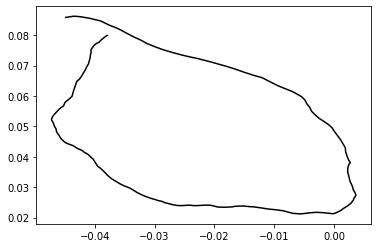

In [41]:
from geomstats.learning.frechet_mean import FrechetMean

mean = FrechetMean(metric=metric, point_type="matrix", method="default")
mean.fit(ds_oriented["cytd"]["dunn"])

mean_estimate = mean.estimate_
plt.plot(mean_estimate[:, 0], mean_estimate[:, 1], "black");

<center><img src="figs/02_cells_quantiles.png" width=1200px alt="default"/></center>

# HW 2: Reproducibility Analysis

- Today's lecture: Future of cell shape analysis.

- Current biological research: use different descriptors of cell shape and cell organization.

Goal of HW2: Reproduce such a study.

<center><img src="figs/02_reproducibility.png" width=800px alt="default"/></center>

https://github.com/bioshape-lab/ece594n/blob/main/hw2-reproducibility/README.md


# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - **B) Shapes of curves**
    - Motivation: Shape of Cancer Treatments
    - Practice: Analysis with SRV
    - Theory: Geometry of SRV manifolds
    - Application: Osteoscarcoma cells
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations